In [5]:
import pandas as pd
import os
import stylia
import matplotlib.pyplot as plt

import stylia as st
from stylia import ONE_COLUMN_WIDTH, TWO_COLUMNS_WIDTH, NamedColorMaps, NamedColors, ContinuousColorMap

data_dir = "../data/"

def load_data(model_id):
    df_0 = pd.read_csv(os.path.join(data_dir, "all_molecules.csv"))
    df_1 = pd.read_csv(os.path.join(data_dir, "all_molecules_{0}.csv".format(model_id)))
    columns = list(df_1.columns)[2:]
    return pd.concat([df_0, df_1[columns]], axis=1)

colors = NamedColors()
npc = colors.get("green")
spc = colors.get("purple")

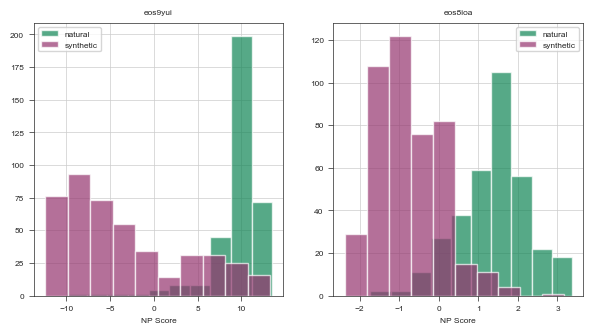

In [8]:
df = load_data("eos9yui") #NP likeness
df_ = load_data("eos8ioa") #NP score
fig, axs = stylia.create_figure(1, 2, width=TWO_COLUMNS_WIDTH, height=0.5 * TWO_COLUMNS_WIDTH)
ax = axs.next()
ax.hist(df[df["category"]=="natural"]["score"], alpha = 0.7, label = "natural", color = npc)
ax.hist(df[df["category"]=="synthetic"]["score"], alpha = 0.7, label = "synthetic", color = spc)
ax.set_title("eos9yui")
ax.set_xlabel("NP Score")
ax.set_ylabel("")
ax.legend()
ax = axs.next()
ax.hist(df_[df_["category"]=="natural"]["nplikeness"], alpha = 0.7, label = "natural", color=npc)
ax.hist(df_[df_["category"]=="synthetic"]["nplikeness"], alpha = 0.7, label = "synthetic", color=spc)
ax.set_title("eos8ioa")
ax.set_xlabel("NP Score")
ax.set_ylabel("")
ax.legend()

/home/gturon/miniconda3/envs/chem/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


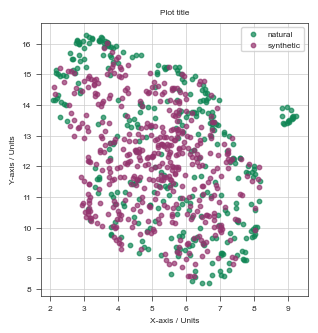

In [9]:
import umap
import numpy as np
df = load_data("eos24ur")
df = df.dropna()
descs = df.iloc[:, 4:]
descs_array = descs.values
descs_nat = df[df["category"]=="natural"].iloc[:,4:]
descs_syn = df[df["category"]=="synthetic"].iloc[:,4:]

umap_trn = umap.UMAP(n_neighbors=100)
all_umap = umap_trn.fit_transform(descs_array)
np_umap = umap_trn.transform(descs_nat)
syn_umap = umap_trn.transform(descs_syn)

fig, axs = stylia.create_figure(1, 1, width=ONE_COLUMN_WIDTH, height=0.5 * TWO_COLUMNS_WIDTH)
ax = axs.next()
ax.scatter(np.transpose(np_umap)[0], np.transpose(np_umap)[1], alpha = 0.7, label="natural", color = npc)
ax.scatter(np.transpose(syn_umap)[0], np.transpose(syn_umap)[1], alpha = 0.7, label = "synthetic", color = spc)
ax.legend()

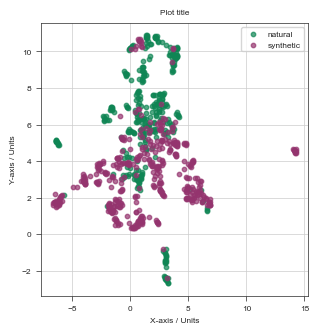

In [10]:
import umap
import numpy as np

df = load_data("eos2gw4")
df = df.dropna()
descs = df.iloc[:, 4:]
descs_array = descs.values
descs_nat = df[df["category"]=="natural"].iloc[:,4:]
descs_syn = df[df["category"]=="synthetic"].iloc[:,4:]

umap_trn = umap.UMAP(n_neighbors=10)
all_umap = umap_trn.fit_transform(descs_array)
np_umap = umap_trn.transform(descs_nat)
syn_umap = umap_trn.transform(descs_syn)

fig, axs = stylia.create_figure(1, 1, width=ONE_COLUMN_WIDTH, height=0.5 * TWO_COLUMNS_WIDTH)
ax = axs.next()
ax.scatter(np.transpose(np_umap)[0], np.transpose(np_umap)[1], alpha = 0.7, label="natural", color=npc)
ax.scatter(np.transpose(syn_umap)[0], np.transpose(syn_umap)[1], alpha = 0.7, label = "synthetic", color=spc)
ax.legend()

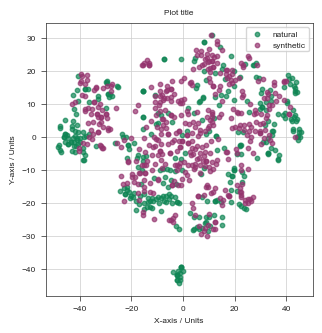

In [11]:
from sklearn.manifold import TSNE

df = load_data("eos24ur")
df = df.dropna()
df = df.reset_index(drop=True)
descs = df.iloc[:, 4:]
descs_array = descs.values
descs_nat = df[df["category"]=="natural"].iloc[:,4:]
descs_syn = df[df["category"]=="synthetic"].iloc[:,4:]

# Apply t-SNE transformation
tsne = TSNE(n_components=2, perplexity=30)
tsne_results = tsne.fit_transform(descs_array)
# Split array based on category
nat_idx = df[df['category'] == 'natural'].index
syn_idx = df[df['category'] == 'synthetic'].index

tsne_nat = tsne_results[nat_idx]
tsne_syn = tsne_results[syn_idx]

fig, axs = stylia.create_figure(1, 1, width=ONE_COLUMN_WIDTH, height=0.5 * TWO_COLUMNS_WIDTH)
ax = axs.next()
ax.scatter(tsne_nat[:,0], tsne_nat[:,1], alpha = 0.7, label="natural", color = npc)
ax.scatter(tsne_syn[:,0], tsne_syn[:,1], alpha = 0.7, label = "synthetic", color=spc)
ax.legend()

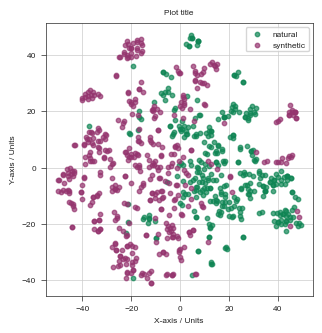

In [12]:
from sklearn.manifold import TSNE

df = load_data("eos2gw4")
df = df.dropna()
df = df.reset_index(drop=True)
descs = df.iloc[:, 4:]
descs_array = descs.values
descs_nat = df[df["category"]=="natural"].iloc[:,4:]
descs_syn = df[df["category"]=="synthetic"].iloc[:,4:]

# Apply t-SNE transformation
tsne = TSNE(n_components=2, perplexity=30)
tsne_results = tsne.fit_transform(descs_array)
# Split array based on category
nat_idx = df[df['category'] == 'natural'].index
syn_idx = df[df['category'] == 'synthetic'].index

tsne_nat = tsne_results[nat_idx]
tsne_syn = tsne_results[syn_idx]

fig, axs = stylia.create_figure(1, 1, width=ONE_COLUMN_WIDTH, height=0.5 * TWO_COLUMNS_WIDTH)
ax = axs.next()
ax.scatter(tsne_nat[:,0], tsne_nat[:,1], alpha = 0.7, label="natural", color = npc)
ax.scatter(tsne_syn[:,0], tsne_syn[:,1], alpha = 0.7, label = "synthetic", color = spc)
ax.legend()

In [13]:
df  = load_data("eos7d58")
df.columns

Index(['file_name', 'inchikey', 'smiles', 'category', 'molecular_weight',
       'logP', 'hydrogen_bond_acceptors', 'hydrogen_bond_donors', 'Lipinski',
       'QED',
       ...
       'Caco2_Wang_drugbank_approved_percentile',
       'Clearance_Hepatocyte_AZ_drugbank_approved_percentile',
       'Clearance_Microsome_AZ_drugbank_approved_percentile',
       'Half_Life_Obach_drugbank_approved_percentile',
       'HydrationFreeEnergy_FreeSolv_drugbank_approved_percentile',
       'LD50_Zhu_drugbank_approved_percentile',
       'Lipophilicity_AstraZeneca_drugbank_approved_percentile',
       'PPBR_AZ_drugbank_approved_percentile',
       'Solubility_AqSolDB_drugbank_approved_percentile',
       'VDss_Lombardo_drugbank_approved_percentile'],
      dtype='object', length=102)

In [14]:
all_props = [
    "molecular_weight", "logP", "hydrogen_bond_acceptors", "hydrogen_bond_donors", "Lipinski", "QED",
    "stereo_centers", "tpsa", "AMES", "BBB_Martins", "Bioavailability_Ma", "CYP1A2_Veith",
    "CYP2C19_Veith", "CYP2C9_Substrate_CarbonMangels", "CYP2C9_Veith", "CYP2D6_Substrate_CarbonMangels",
    "CYP2D6_Veith", "CYP3A4_Substrate_CarbonMangels", "CYP3A4_Veith", "Carcinogens_Lagunin", "ClinTox",
    "DILI", "HIA_Hou", "NR-AR-LBD", "NR-AR", "NR-AhR", "NR-Aromatase", "NR-ER-LBD", "NR-ER", "NR-PPAR-gamma",
    "PAMPA_NCATS", "Pgp_Broccatelli", "SR-ARE", "SR-ATAD5", "SR-HSE", "SR-MMP", "SR-p53", "Skin_Reaction",
    "hERG", "Caco2_Wang", "Clearance_Hepatocyte_AZ", "Clearance_Microsome_AZ", "Half_Life_Obach",
    "HydrationFreeEnergy_FreeSolv", "LD50_Zhu", "Lipophilicity_AstraZeneca", "PPBR_AZ", "Solubility_AqSolDB",
    "VDss_Lombardo"
]

In [20]:
cols_plot = []
for c in df.columns:
    if "drugbank_approved_percentile" in c:
        cols_plot += [c]
len(cols_plot)

49

<Axes: xlabel='molecular_weight_drugbank_approved_percentile', ylabel='Density'>

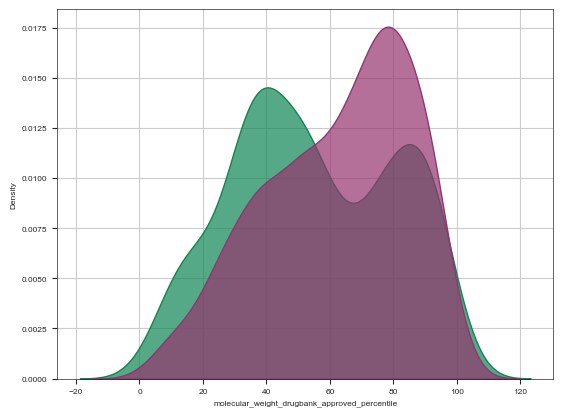

In [18]:
import seaborn as sns

sns.kdeplot(df[df["category"]=="natural"]["molecular_weight_drugbank_approved_percentile"], alpha = 0.7, color = npc, fill=True)
sns.kdeplot(df[df["category"]=="synthetic"]["molecular_weight_drugbank_approved_percentile"], alpha = 0.7, color = spc, fill = True)

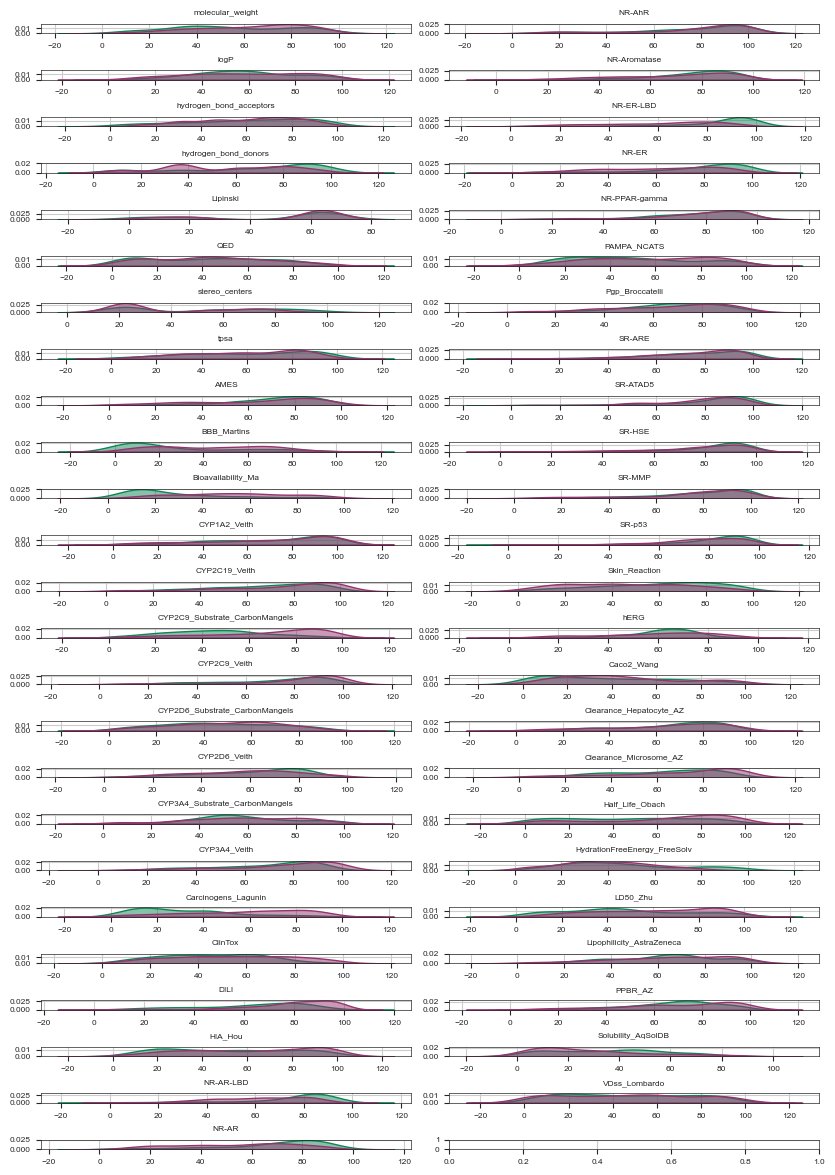

In [28]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(25,2, figsize=(8.3,11.7))  # A4 size in inches: 11.7 x 8.3 for half A4

# Ensure there are as many axes as columns
for i, column in enumerate(cols_plot):
    ax = axs[i % 25, i // 25]  # Determine the position of the subplot
    sns.kdeplot(df[df["category"] == "natural"][column], ax=ax, alpha=0.5, color=npc, fill=True)
    sns.kdeplot(df[df["category"] == "synthetic"][column], ax=ax, alpha=0.5, color=spc, fill=True)
    ax.set_title(column.replace("_drugbank_approved_percentile", ""))
    ax.set_xlabel('')  # Remove individual x-axis labels for cleaner look
    ax.set_ylabel('')  # Remove individual y-axis labels for cleaner look

plt.tight_layout()  # Adjust subplots to fit in figure area.
plt.show()